<a href="https://colab.research.google.com/github/sknair12/CustomerRetention/blob/main/insurance_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is to perform customer churn analysis based on the kaggele dataset available in https://www.kaggle.com/datasets/merishnasuwal/auto-insurance-churn-analysis-dataset


In [111]:
#Perform required Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import BinaryCrossentropy


In [51]:
#For inline graphs
%matplotlib inline

In [52]:
#read churn file
df_churn = pd.read_csv("/content/churn.csv")

In [53]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

<Axes: >

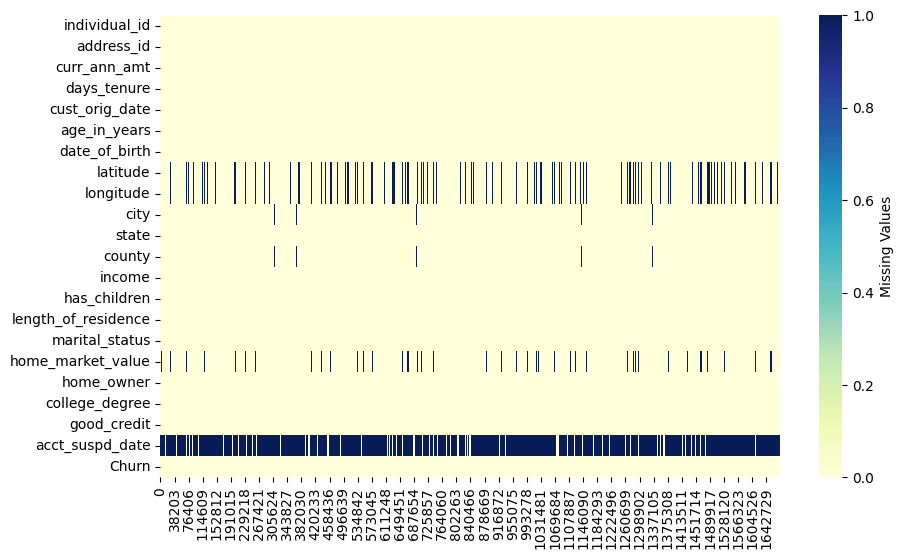

In [54]:
#Analyse data
plt.figure(figsize=(10,6))
sns.heatmap(df_churn.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Values'})

In [55]:
#sns.pairplot(df_churn)

In [56]:
#Update missing city names and county from the row before it
df_churn['city']=df_churn['city'].fillna(method='ffill')
df_churn['county']=df_churn['county'].fillna(method='ffill')
#Fill home market value based on the mode value
df_churn['home_market_value']=df_churn['home_market_value'].fillna(df_churn['home_market_value'].mode()[0])

In [57]:
#Check current null values
df_churn.isnull().sum()

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                         0
state                        0
county                       0
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value            0
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1487453
Churn                        0
dtype: int64

In [58]:
#Check if duplicate row are present
df_churn[df_churn.duplicated()]

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn


<Axes: xlabel='count', ylabel='home_market_value'>

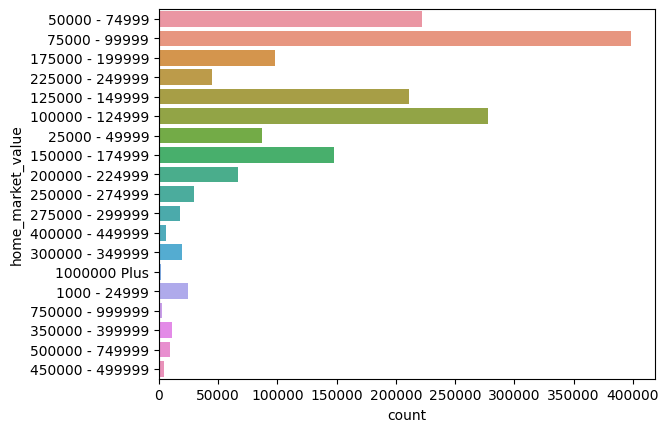

In [59]:
#Check home value distribution to understand the spread cusotmer's wealth
sns.countplot(df_churn, y='home_market_value')

<Axes: xlabel='curr_ann_amt'>

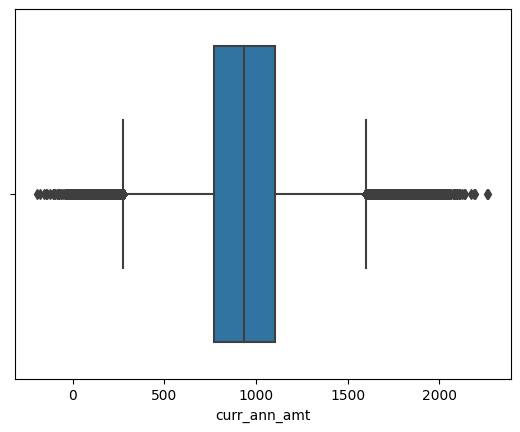

In [60]:
#check for outliers
sns.boxplot(x=df_churn['curr_ann_amt'])

<Axes: xlabel='days_tenure'>

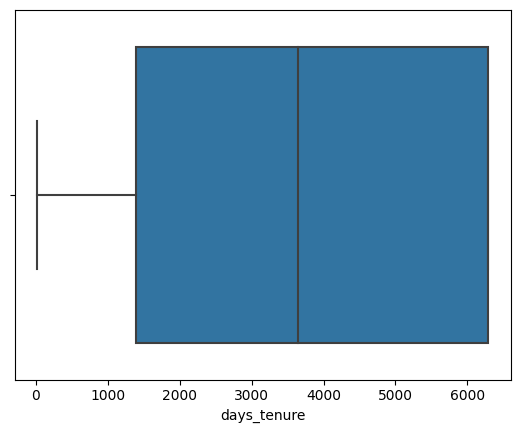

In [61]:
sns.boxplot(x=df_churn['days_tenure'])

<Axes: xlabel='age_in_years'>

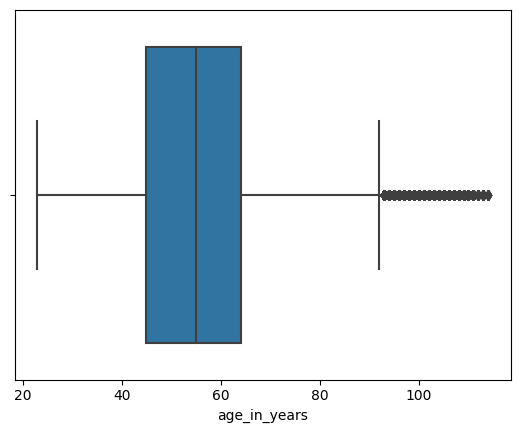

In [62]:
sns.boxplot(x=df_churn['age_in_years'])

<Axes: xlabel='income'>

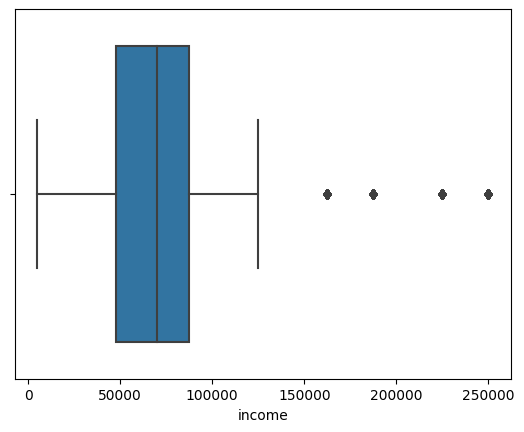

In [63]:
sns.boxplot(x=df_churn['income'])

In [64]:
columnstofix = ['age_in_years', 'curr_ann_amt', 'income']
Q1 = df_churn[columnstofix].quantile(0.25)
Q3 = df_churn[columnstofix].quantile(0.75)
IQR = Q3 - Q1

df_churn = df_churn[~((df_churn[columnstofix] < (Q1 - 1.5 * IQR)) |(df_churn[columnstofix] > (Q3 + 1.5 * IQR))).any(axis=1)]

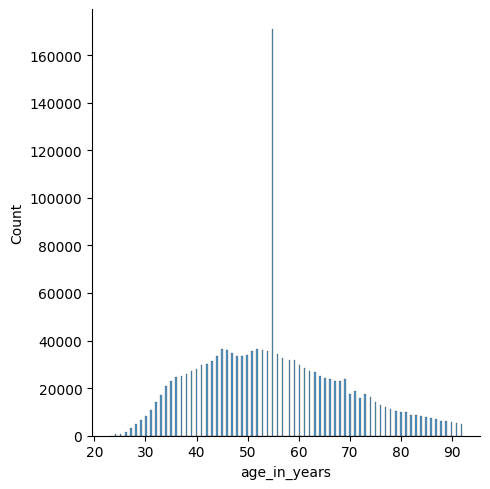

In [65]:
#Check the distribution after removing the outliers
sns.displot(data=df_churn['age_in_years'])

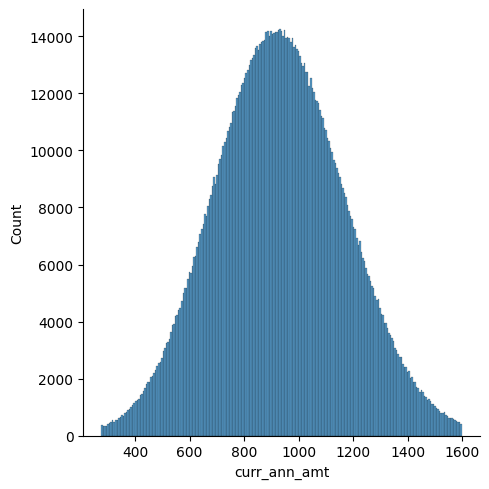

In [66]:
sns.displot(data=df_churn['curr_ann_amt'])

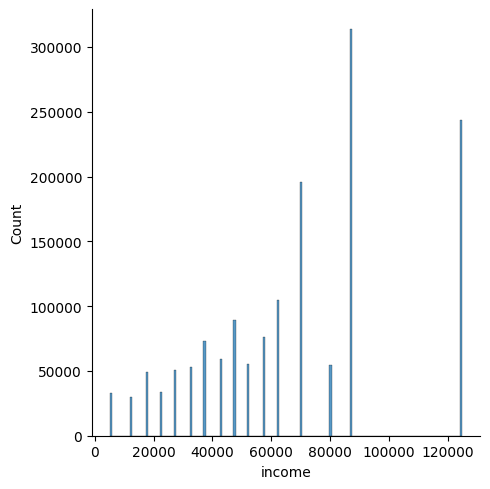

In [67]:
sns.displot(data=df_churn['income'])

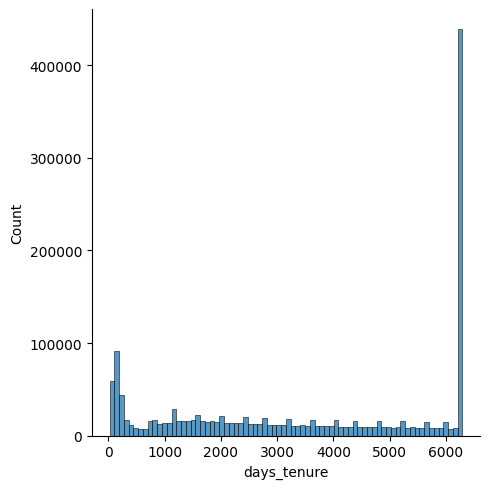

In [68]:
sns.displot(data=df_churn['days_tenure'])

<ipython-input-69-4883171ffcc5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_churn.corr());


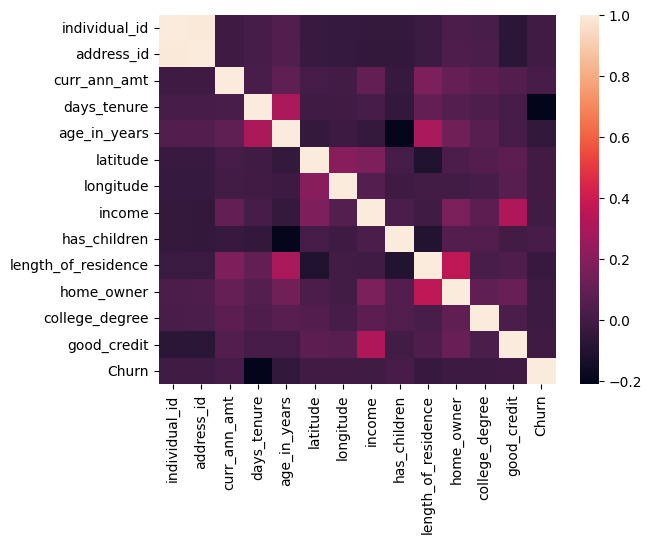

In [69]:
sns.heatmap(df_churn.corr());

In [70]:
df_only_churn=df_churn[df_churn['Churn']==1]

<ipython-input-71-effab1b23c63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_only_churn.corr());


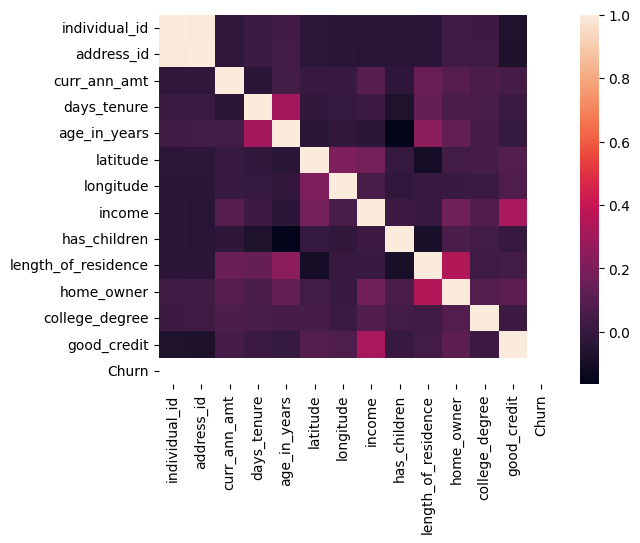

In [71]:
sns.heatmap(df_only_churn.corr());

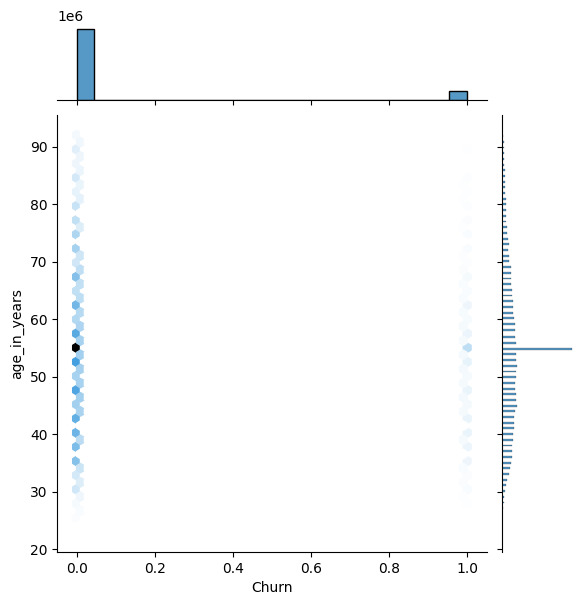

In [72]:
sns.jointplot(data=df_churn, x='Churn', y='age_in_years', kind='hex')

<ipython-input-73-c94cbdeee307>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_churn.groupby(['marital_status']).sum().plot(kind='pie', y='individual_id', title='Marital Status - Entire Dataset')


<Axes: title={'center': 'Marital Status - Entire Dataset'}, ylabel='individual_id'>

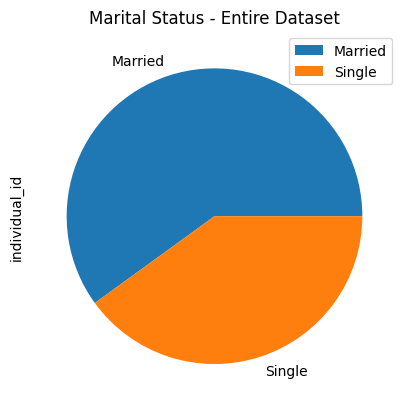

In [73]:
#Check if any specific status influence churn
df_churn.groupby(['marital_status']).sum().plot(kind='pie', y='individual_id', title='Marital Status - Entire Dataset')

([<matplotlib.patches.Wedge at 0x7d7dfea323e0>,
 [Text(-0.3395418432568846, 1.0462845390608222, 'Married'),
  Text(0.33954184325688397, -1.0462845390608226, 'Single')],
 [Text(-0.18520464177648246, 0.5707006576695394, '60.0%\n909428'),
  Text(0.18520464177648213, -0.5707006576695395, '40.0%\n606575')])

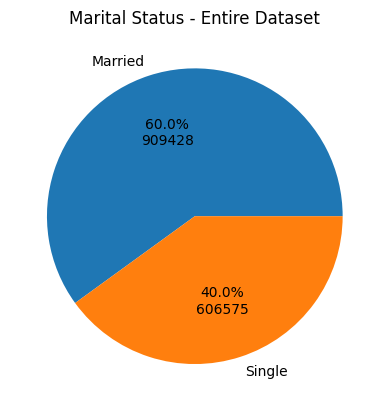

In [74]:
total_all = df_churn['individual_id'].value_counts().values.sum()
total_churn = df_only_churn['individual_id'].value_counts().values.sum()

#set formatting options
def fmt_all(x):
    return '{:.1f}%\n{:.0f}'.format(x, total_all*x/100)
def fmt_churn(x):
    return '{:.1f}%\n{:.0f}'.format(x, total_churn*x/100)

plt.title('Marital Status - Entire Dataset')
plt.pie(df_churn['marital_status'].value_counts().values, labels=df_churn['marital_status'].value_counts().index, autopct=fmt_all)


([<matplotlib.patches.Wedge at 0x7d7dfea6dc60>,
 [Text(-0.3202731323210969, 1.0523426821683293, 'Married'),
  Text(0.320273033793663, -1.0523427121544595, 'Single')],
 [Text(-0.17469443581150737, 0.5740050993645432, '59.4%\n104342'),
  Text(0.1746943820692707, -0.5740051157206142, '40.6%\n71306')])

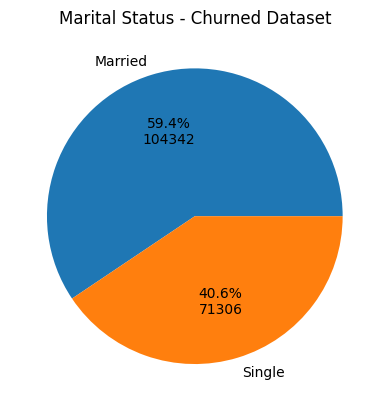

In [75]:
plt.title('Marital Status - Churned Dataset')
plt.pie(df_only_churn['marital_status'].value_counts().values, labels=df_only_churn['marital_status'].value_counts().index, autopct=fmt_churn)


([<matplotlib.patches.Wedge at 0x7d7dfeab0d00>,
 [Text(-0.0721324673938875, 1.097632409847518, '1.0'),
  Text(0.07213246739388736, -1.097632409847518, '0.0')],
 [Text(-0.03934498221484772, 0.5987085871895553, '52.1%\n789668'),
  Text(0.03934498221484765, -0.5987085871895553, '47.9%\n726335')])

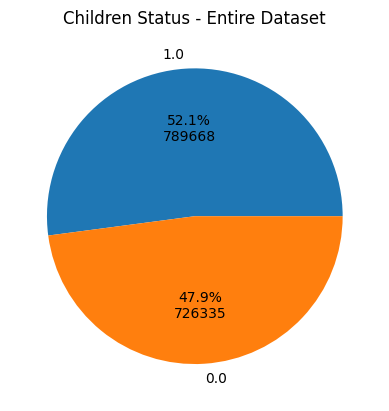

In [76]:
plt.title('Children Status - Entire Dataset')
plt.pie(df_churn['has_children'].value_counts().values, labels=df_churn['has_children'].value_counts().index, autopct=fmt_all)


([<matplotlib.patches.Wedge at 0x7d7dfeaf40a0>,
 [Text(-0.1693297047363882, 1.0868888862684574, '1.0'),
  Text(0.1693297047363876, -1.0868888862684576, '0.0')],
 [Text(-0.092361657128939, 0.5928484834191585, '54.9%\n96465'),
  Text(0.09236165712893867, -0.5928484834191586, '45.1%\n79183')])

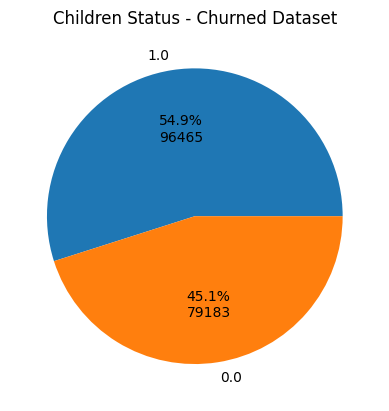

In [77]:
plt.title('Children Status - Churned Dataset')
plt.pie(df_only_churn['has_children'].value_counts().values, labels=df_only_churn['has_children'].value_counts().index, autopct=fmt_churn)


([<matplotlib.patches.Wedge at 0x7d7dfe912ec0>,
 [Text(-0.9090173162173975, 0.6194251519085419, '1.0'),
  Text(0.9090173162173972, -0.6194251519085423, '0.0')],
 [Text(-0.4958276270276713, 0.3378682646773864, '81.0%\n1227361'),
  Text(0.49582762702767114, -0.3378682646773867, '19.0%\n288642')])

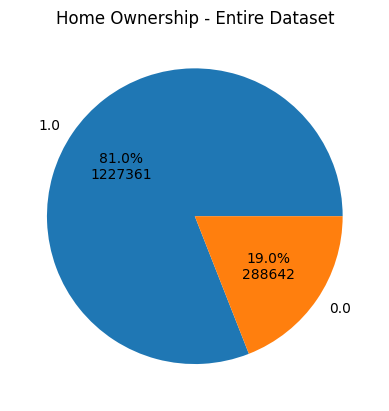

In [78]:
plt.title('Home Ownership - Entire Dataset')
plt.pie(df_churn['home_owner'].value_counts().values, labels=df_churn['home_owner'].value_counts().index, autopct=fmt_all)


([<matplotlib.patches.Wedge at 0x7d7dfe951ed0>,
 [Text(-0.8788828155617607, 0.6614869586849255, '1.0'),
  Text(0.8788828155617606, -0.6614869586849256, '0.0')],
 [Text(-0.4793906266700513, 0.36081106837359567, '79.5%\n139575'),
  Text(0.47939062667005117, -0.3608110683735957, '20.5%\n36073')])

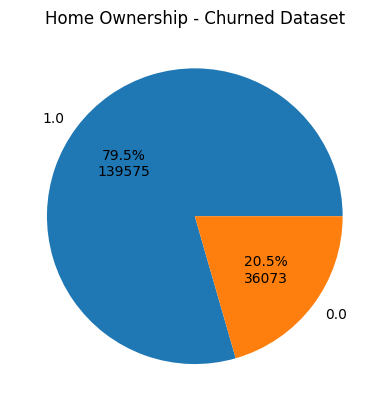

In [79]:
plt.title('Home Ownership - Churned Dataset')
plt.pie(df_only_churn['home_owner'].value_counts().values, labels=df_only_churn['home_owner'].value_counts().index, autopct=fmt_churn)


([<matplotlib.patches.Wedge at 0x7d7dfe994d90>,
 [Text(-0.5339455115659143, 0.9617183530944048, '0.0'),
  Text(0.5339455115659146, -0.9617183530944046, '1.0')],
 [Text(-0.2912430063086805, 0.5245736471424026, '66.1%\n1002575'),
  Text(0.29124300630868066, -0.5245736471424024, '33.9%\n513428')])

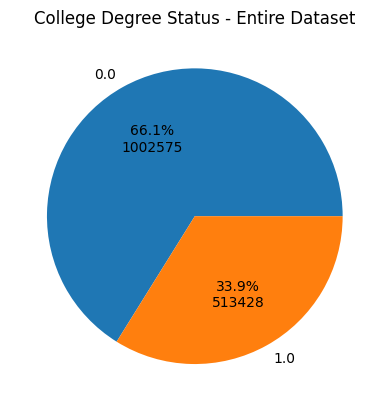

In [80]:
plt.title('College Degree Status - Entire Dataset')
plt.pie(df_churn['college_degree'].value_counts().values, labels=df_churn['college_degree'].value_counts().index, autopct=fmt_all)


([<matplotlib.patches.Wedge at 0x7d7dfe9b3910>,
 [Text(-0.600799188308381, 0.9214338475050668, '0.0'),
  Text(0.6007991020375153, -0.9214339037559425, '1.0')],
 [Text(-0.3277086481682078, 0.5026002804573092, '68.4%\n120129'),
  Text(0.32770860111137196, -0.5026003111396049, '31.6%\n55519')])

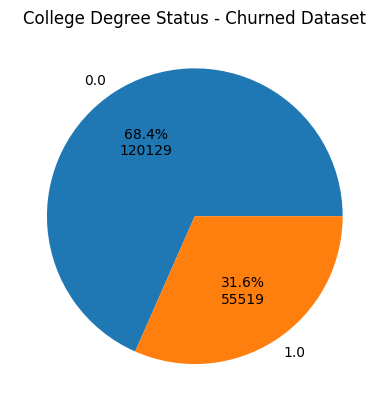

In [81]:
plt.title('College Degree Status - Churned Dataset')
plt.pie(df_only_churn['college_degree'].value_counts().values, labels=df_only_churn['college_degree'].value_counts().index, autopct=fmt_churn)


([<matplotlib.patches.Wedge at 0x7d7dfe9f6740>,
 [Text(-0.9476523831290206, 0.5585292836995105, '1.0'),
  Text(0.9476523831290204, -0.5585292836995106, '0.0')],
 [Text(-0.5169012998885566, 0.3046523365633693, '83.0%\n1259004'),
  Text(0.5169012998885565, -0.3046523365633694, '17.0%\n256999')])

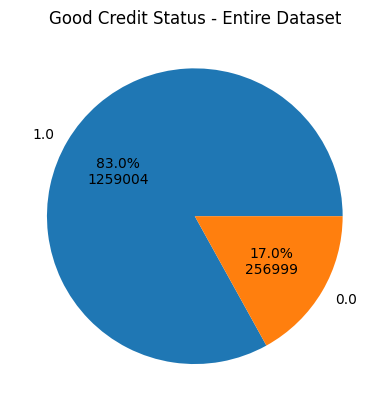

In [82]:
plt.title('Good Credit Status - Entire Dataset')
plt.pie(df_churn['good_credit'].value_counts().values, labels=df_churn['good_credit'].value_counts().index, autopct=fmt_all)


([<matplotlib.patches.Wedge at 0x7d7dfe835780>,
 [Text(-0.9343336070730285, 0.5805348488195207, '1.0'),
  Text(0.9343336342498253, -0.5805348050802069, '0.0')],
 [Text(-0.5096365129489245, 0.3166553720833749, '82.3%\n144564'),
  Text(0.5096365277726319, -0.31665534822556735, '17.7%\n31084')])

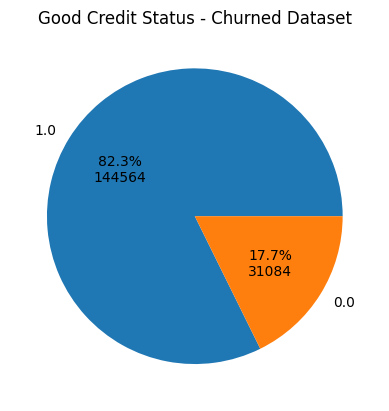

In [83]:
plt.title('Good Credit Status - Churned Dataset')
plt.pie(df_only_churn['good_credit'].value_counts().values, labels=df_only_churn['good_credit'].value_counts().index, autopct=fmt_churn)


In [84]:
df_churn = df_churn.drop(
    [
        'acct_suspd_date',
        'county',
        'city',
        'state',
        'individual_id',
        'date_of_birth',
        'cust_orig_date',
        'latitude',
        'longitude',
        'address_id'
    ],
    axis=1
)


In [88]:
df_churn_copy=df_churn

In [ ]:
#Remove imbalanced data - Undersampling
#df_churn=df_churn_copy
#df_churn = pd.concat([df_churn[df_churn['Churn']==0].head(175648), df_churn[df_churn['Churn']==1]], axis=0)

#Code for Oversampling
#A, b = make_classification(n_classes=2, class_sep=2, weights=[0.5, 0.5], n_informative=3, n_redundant=1, flip_y=0, n_features=12, n_clusters_per_class=1, n_samples=1516003, random_state=42)


In [90]:
X = df_churn.drop(
    [
        'Churn'
    ],
    axis=1
)

Y=df_churn['Churn'].values

In [93]:
#Map text values to 0 and 1 and update the home value as lower range
X.replace(
{
    'marital_status':
    {
        'Married':1,
        'Single':0
    }

},
inplace=True
)
X['home_market_value']=X['home_market_value'].str.split('-').str[0].str.extract('(\d+)')

In [96]:
#Use this piece of code for SMOTE and verifying the dimensions. Keeping it as commented for now.
#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, Y)
#unique, counts = np.unique(y_resampled, return_counts=True)
#class_counts = dict(zip(unique, counts))
#print(class_counts)
#X_smote= pd.DataFrame(X_resampled)
#Y_smote=pd.DataFrame(y_resampled)
#X_smote["Churn"]=Y_smote[0]
#X=X_smote.drop(
#    [
#        'Churn'
#    ],
#    axis=1
#)


#Y=X_smote['Churn'].values

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, random_state=42)

In [98]:
#Use logistic regression to train and predict churn
lregression = LogisticRegression()
lregression.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred = lregression.predict(x_test)


In [100]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8841362660413389


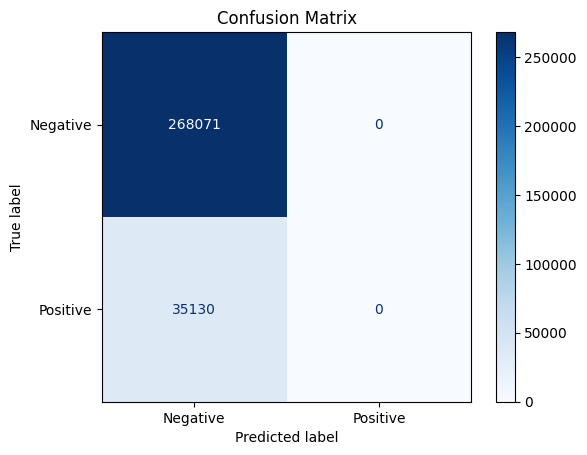

In [101]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [104]:
#create decison tree classifier
model = DecisionTreeClassifier(random_state=42)

In [105]:
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)



Accuracy: 0.8163693391512561
Confusion Matrix:
[[237955  30116]
 [ 25561   9569]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90    268071
           1       0.24      0.27      0.26     35130

    accuracy                           0.82    303201
   macro avg       0.57      0.58      0.58    303201
weighted avg       0.83      0.82      0.82    303201



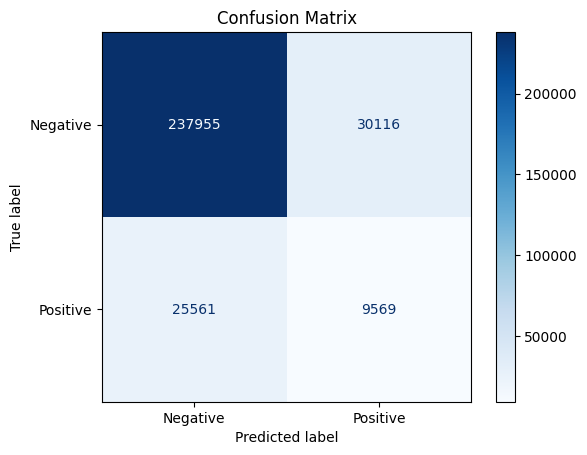

In [106]:
# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()

In [108]:

max_depth=10
accuracies=[]
for depth in range(1, max_depth+1):
    tree_test=DecisionTreeClassifier(max_depth=depth)
    tree_test.fit(x_train, y_train)
    y_pred = tree_test.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

Text(0.5, 1.0, 'Model Accuracy')

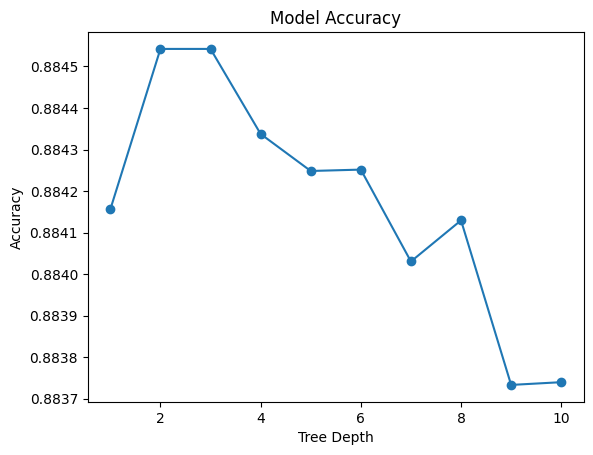

In [ ]:
plt.plot(range(1, max_depth+1), accuracies, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

In [109]:
rForestModel = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rForestModel.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = rForestModel.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8836811224237388
Confusion Matrix:
[[260621   7450]
 [ 27818   7312]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94    268071
           1       0.50      0.21      0.29     35130

    accuracy                           0.88    303201
   macro avg       0.70      0.59      0.61    303201
weighted avg       0.86      0.88      0.86    303201



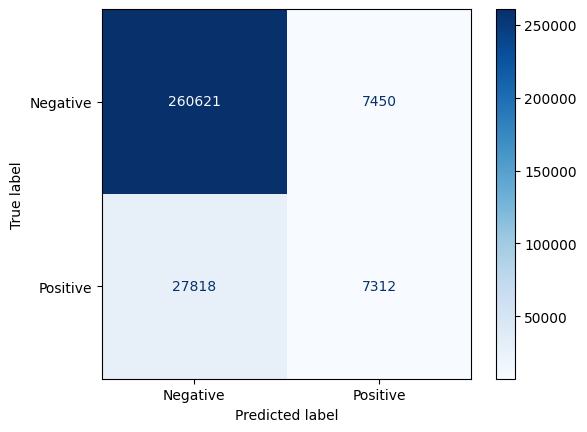

In [110]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')

In [116]:
# Standardize features (optional but often beneficial)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [117]:
#Create validation sets
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [118]:
# Define custom loss function with class weights
def weighted_binary_crossentropy(y_true, y_pred):
    # Define the class weights (adjust as needed)
    class_weights = tf.constant([1.1, 1.15], dtype=tf.float32)  # Cast to float32
    # Cast y_true to float32 to match the data type of class_weights
    y_true = tf.cast(y_true, tf.float32)
    # Apply the class weights to the raw logits
    weighted_logits = class_weights * (y_true * tf.math.log(y_pred + 1e-15) + (1 - y_true) * tf.math.log(1 - y_pred + 1e-15))
    # Calculate the mean loss
    loss = -tf.reduce_mean(weighted_logits)
    return loss

In [ ]:
#df_xtest=pd.DataFrame(x_test)
#df_xtest[2].max() # 2.6429092509112744
#df_xtest[2].min() # -2.2958751558019386, 2.6429092509112744
# -2.29

2.6429092509112744

In [119]:
# Create a deep learning model
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),  # Input layer with the number of features
    layers.Dense(128, activation='relu'),     # Hidden layer with ReLU activation
    layers.Dense(64, activation='relu'),      # Hidden layer with ReLU activation
    layers.Dense(1, activation='sigmoid')     # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss=weighted_binary_crossentropy, metrics=['accuracy'])


# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor (validation accuracy)
    patience=10,  # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore the best model weights
)

# Define model checkpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # Path to save the best model weights
    monitor='val_accuracy',  # Metric to monitor (validation accuracy)
    save_best_only=True,  # Save only the best model
    mode='max',  # Mode 'max' means higher validation accuracy is better
    verbose=1  # Print a message when saving the best model
)

In [121]:
# Ensure the data has the correct data type (e.g., float32)
x_train = x_train.astype(np.float32)
x_val = x_val.astype(np.float32)
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping,model_checkpoint])


In [128]:
best_model = tf.keras.models.load_model('best_model.h5')
# Make predictions on new data
y_pred = best_model.predict(x_test)


4738/4738 [==============================] - 6s 1ms/step


In [129]:

test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

4738/4738 [==============================] - 8s 2ms/step - loss: 0.3022 - accuracy: 0.8858
Test Accuracy: 0.8858252763748169


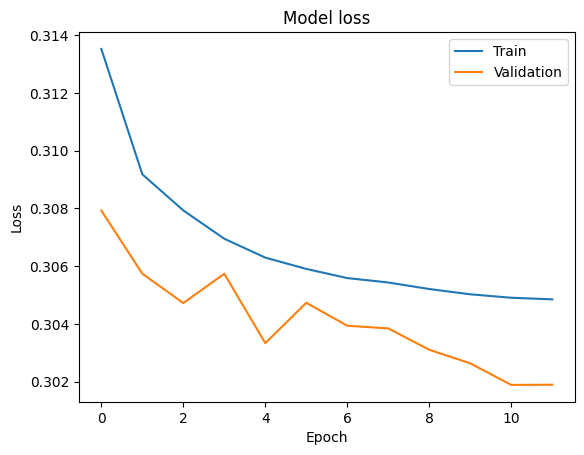

In [ ]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


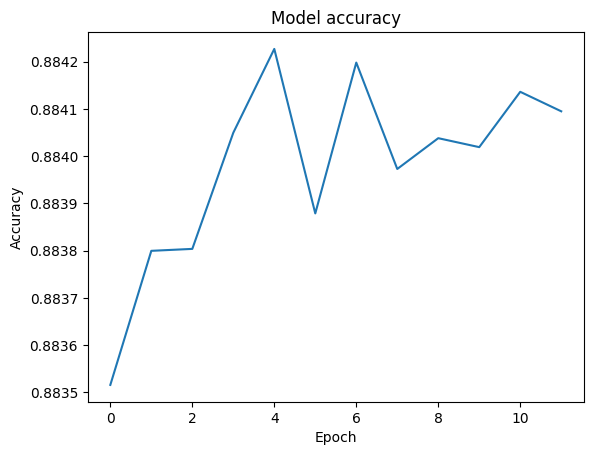

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

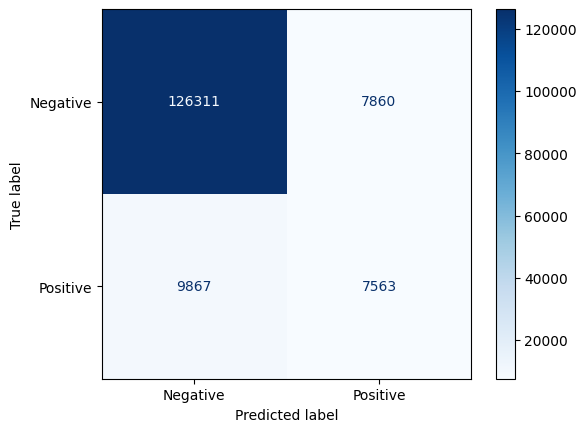

In [130]:
y_predclasses = (y_pred > 0.3).astype(int)
conf_matrix = confusion_matrix(y_test, y_predclasses)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')

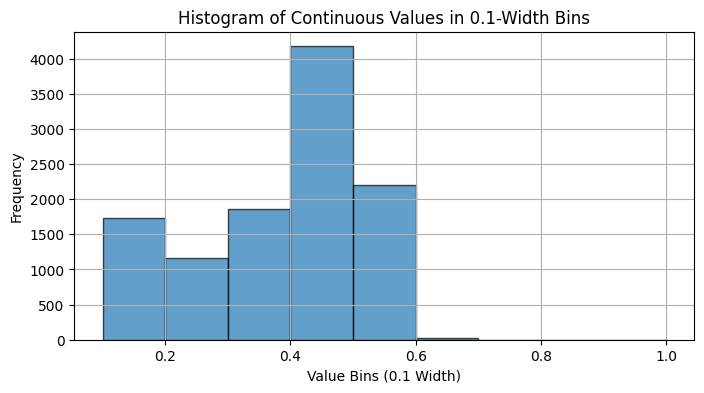

In [ ]:
# Define the bin width
bin_width = 0.1
# Calculate the number of bins
num_bins = (1 / bin_width) + 1
# Create an array to store the bin edges
bin_edges = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# Bin the values
bin_indices = np.digitize(y_pred, bin_edges)

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 4))
plt.hist(y_pred, bins=bin_edges, edgecolor='k', alpha=0.7)
plt.xlabel('Value Bins (0.1 Width)')
plt.ylabel('Frequency')
plt.title('Histogram of Continuous Values in 0.1-Width Bins')
plt.grid(True)
plt.show()

In [131]:
# Define a function to compute gradients
@tf.function
def compute_gradients(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)
    gradients = tape.gradient(predictions, x)
    return gradients

In [132]:
model = tf.keras.models.load_model('best_model.h5')
# Choose a sample from dataset
sample_index = 0
input_sample = x_test[sample_index:sample_index+1]  # Adjust as needed

# Compute gradients for the sample
gradients = compute_gradients(input_sample)
print(gradients.numpy().shape)


(1, 11)


In [133]:
#GET Sample test value with positive prediction
predictions = model.predict(x_test)
# Define a threshold
threshold = 0.5
# Get the indices of test samples with predictions greater than threshold
indices_above_threshold = np.where(predictions > threshold)[0]

# Extract the test values for which predictions are greater than threshold
test_values_above_threshold = x_test[indices_above_threshold]
labels_above_threshold = y_test[indices_above_threshold]
# Now, test_values_above_threshold contains the test samples for which predictions are greater than the threshold

4738/4738 [==============================] - 6s 1ms/step


In [134]:
predicted_value = model.predict(test_values_above_threshold[0].reshape(1, -1))

1/1 [==============================] - 0s 21ms/step


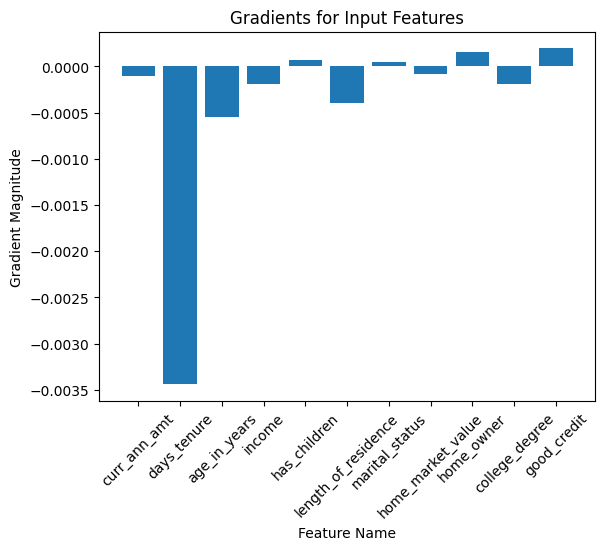

In [ ]:
# Convert input_sample to a TensorFlow tensor
input_sample_tf = tf.convert_to_tensor(input_sample, dtype=tf.float32)

# Define a function to compute gradients
@tf.function
def compute_gradients(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)
    gradients = tape.gradient(predictions, x)
    return gradients

# Compute gradients for the TensorFlow tensor
gradients = compute_gradients(input_sample_tf)

# Convert gradients to a NumPy array
gradients_np = gradients.numpy()

# List of feature names
feature_names = ["curr_ann_amt", "days_tenure", "age_in_years", "income", "has_children","length_of_residence", "marital_status", "home_market_value","home_owner", "college_degree", "good_credit"]

# Create a bar chart to visualize gradients with feature names
plt.bar(range(len(gradients_np[0])), gradients_np[0], tick_label=feature_names)
plt.xlabel('Feature Name')
plt.ylabel('Gradient Magnitude')
plt.title('Gradients for Input Features')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()

In [135]:
df_testing = pd.DataFrame(x_test)
df_testing["Churn"]=y_test
df_testing[df_testing["Churn"]==1]

x_test[11]

array([ 1.01498955, -1.42219759, -0.22015418,  1.69326975, -1.04238486,
       -0.2654331 ,  0.81638186,  1.80386593,  0.48500653,  1.39639143,
        0.45158636])

In [136]:
feature_values=x_test[11]
feature_values[2]=999
feature_values

array([ 1.01498955e+00, -1.42219759e+00,  9.99000000e+02,  1.69326975e+00,
       -1.04238486e+00, -2.65433102e-01,  8.16381856e-01,  1.80386593e+00,
        4.85006526e-01,  1.39639143e+00,  4.51586357e-01])

In [155]:

# Define the input data (a single data point)
input_data = x_test[11].astype(np.float32)

input_data = input_data.reshape(1, -1)

# Convert the input data to a TensorFlow tensor
input_data_tensor = tf.convert_to_tensor(input_data, dtype=tf.float32)

# Define the DNN model
model = tf.keras.models.load_model('best_model.h5')  # Load trained model

# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(input_data_tensor)
    predictions = model(input_data_tensor)

# Get the gradients
gradients = tape.gradient(predictions, input_data_tensor)

# Calculate feature importance (magnitude of gradients)
feature_importance = np.abs(gradients.numpy())

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
top_three_features = sorted_indices[0][:3]


feature_names = ["curr_ann_amt", "days_tenure", "age_in_years", "income", "has_children","length_of_residence", "marital_status", "home_market_value","home_owner", "college_degree", "good_credit"]

top_three_feature_names = [feature_names[i] for i in top_three_features]

# top_three_feature_names contains the names of the top three influential features
print(top_three_feature_names)

['curr_ann_amt', 'days_tenure', 'age_in_years']


In [157]:
# Define the feature values you want to analyze
feature_to_analyze = np.linspace(-2.29, 2.65, 100)  # Define a range of values

# Initialize a list to store feature values that result in predictions of 0.4 or more
valid_feature_values = []

# Keep other features constant
constant_features = [1.2937503,  -1.47233115, -1.36537954, -0.34919971,  0.95933859, -1.04720674,-1.22491703, -0.45751255,  0.48500651, -0.71613159,  0.45158635]


In [175]:
# Define the feature values you want to analyze
feature_to_analyze = np.linspace(-2.29, 2.65, 100)  # Define a range of values

# Initialize a list to store feature values that result in predictions of 0.4 or more
valid_feature_values = []

# Keep other features constant
constant_features = [1.2937503, -1.47233115, -1.36537954, -0.34919971, 0.95933859, -1.04720674, -1.22491703, -0.45751255, 0.48500651, -0.71613159, 0.45158635]

input_samples = []

# Iterate through the feature values
for feature_value in feature_to_analyze:
    # Create a copy of constant_features to keep it unchanged
    current_features = constant_features.copy()
    # Set the value of the feature you want to analyze to the current feature_value
    current_features[2] = feature_value
    # Create an input sample with the current feature value and constant features
    input_sample = np.array(current_features).reshape(1, -1)
    input_samples.append(input_sample)
    # Use deep neural network model to make predictions
    prediction = model.predict(input_sample)

    # Check if the prediction is 0.4 or more
    if prediction >= 0.4:
        valid_feature_values.append(feature_value)

# Reshape input_samples to (100, -1)
input_samples = np.array(input_samples).reshape(100, -1)

# Print the valid feature values that result in predictions of 0.4 or more
print("Feature values that result in predictions of 0.4 or more:", valid_feature_values)

1/1 [==============================] - 0s 32ms/step
Feature values that result in predictions of 0.4 or more: [-2.29, -2.24010101010101, -2.1902020202020203, -2.14030303030303, -2.0904040404040405, -2.0405050505050504, -1.9906060606060607, -1.9407070707070708, -1.890808080808081, -1.840909090909091, -1.7910101010101012, -1.741111111111111, -1.6912121212121214, -1.6413131313131313, -1.5914141414141416, -1.5415151515151515, -1.4916161616161618, -1.4417171717171717, -1.391818181818182, -1.341919191919192, -1.2920202020202023, -1.2421212121212122, -1.1922222222222223, -1.1423232323232324, -1.0924242424242425, -1.0425252525252526, -0.9926262626262627, -0.9427272727272729, -0.892828282828283, -0.8429292929292931, -0.7930303030303032, -0.7431313131313133, -0.6932323232323234, -0.6433333333333335, -0.5934343434343436, -0.5435353535353538, -0.4936363636363639, -0.443737373737374, -0.3938383838383841, -0.3439393939393942, -0.2940404040404043, -0.24414141414141444, -0.19424242424242433, -0.144343

In [ ]:

# Load the pre-trained model
model = tf.keras.models.load_model('best_model.h5')

# Define the feature values you want to analyze
feature_to_analyze = np.linspace(-2.29, 2.65, 100)  # Define a range of values

# Initialize a list to store feature values that result in predictions of 0.4 or more
valid_feature_values = []

# Keep other features constant
constant_features = [1.2937503, -1.47233115, -1.36537954, -0.34919971, 0.95933859, -1.04720674,
                     -1.22491703, -0.45751255, 0.48500651, -0.71613159, 0.45158635]
predicted_outcomes = []
# Iterate through the feature values
for feature_value in feature_to_analyze:
    # Update the feature of interest while keeping others constant
    constant_features[2] = feature_value

    # Create an input sample with the updated feature
    input_sample = np.array(constant_features).reshape(1, -1)

    # Use deep neural network model to make predictions
    prediction = model.predict(input_sample)[0]


    predicted_outcomes.append([feature_value, prediction[0]])

    # Check if the prediction is 0.4 or more
    #if prediction >= 0.4:
    #    valid_feature_values.append(feature_value)

# Print the valid feature values that result in predictions of 0.4 or more
#print("Feature values that result in predictions of 0.4 or more:", valid_feature_values)

1/1 [==============================] - 0s 26ms/step


In [ ]:
df_outcomes=pd.DataFrame(predicted_outcomes,columns=['input value', 'predicted value'])

<Axes: xlabel='input value'>

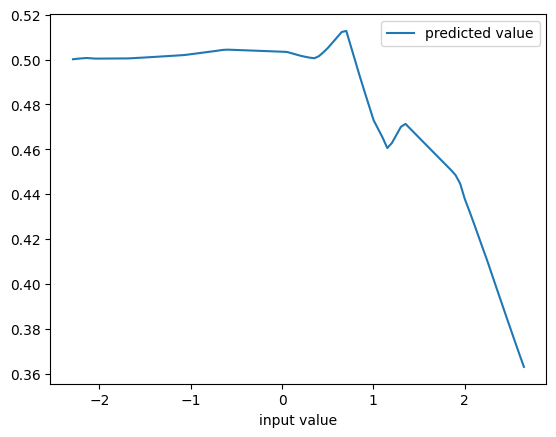

In [ ]:
df_outcomes.plot(x='input value', y='predicted value')